In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)


# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Let's continue with our NYC 311 service requests example.

In [2]:
complaints = pd.read_csv('../data/311-service-requests.csv')

/home/gong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [3]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [5]:
# get complaint type like 'Noise%'

noisy_types = []
for ct in complaints['Complaint Type'].unique():
    if ct[0:len('Noise')].upper() == 'NOISE': 
        #print(ct)
        noisy_types.append(ct)
        
noisy_types

['Noise - Street/Sidewalk',
 'Noise - Commercial',
 'Noise - Vehicle',
 'Noise - House of Worship',
 'Noise - Park',
 'Noise',
 'Noise - Helicopter']

In [34]:
bCodeQuality = 3

if bCodeQuality==1:
    # prepare df for all noise types
    noise_complaints = complaints[complaints['Complaint Type'] == 'Noise']
    noise_complaints.shape

    # merge dataframes for different noise type
    for ct in noisy_types:
        if ct != 'Noise':
            print(ct)
            df_tmp = complaints[complaints['Complaint Type'] == ct]
            print(df_tmp.shape)
            noise_complaints = pd.concat([noise_complaints, df_tmp])
            print(noise_complaints.shape)

if bCodeQuality==2:
    # use list comprehension to merge
    df_tmp = [complaints[complaints['Complaint Type'] == ct] for ct in noisy_types]
    noise_complaints = pd.concat(df_tmp)    

if bCodeQuality==3:
    noise_complaints = complaints[complaints['Complaint Type'].str.contains('Noise')]

noise_complaints.shape
# (8934, 52)

(8942, 52)

In [9]:
noise_complaints.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
73,26595413,10/30/2013 11:53:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10007,NaN,NaN,NaN,NaN,CHAMBERS STREET,WEST BROADWAY,INTERSECTION,NEW YORK,NaN,NaN,Open,NaN,NaN,01 MANHATTAN,MANHATTAN,981689.0,199960.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.715520,-74.009238,"(40.71552037648501, -74.0092382743091)"
74,26595414,10/30/2013 11:53:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10019,NaN,NaN,NaN,NaN,WEST 54 STREET,7 AVENUE,INTERSECTION,NEW YORK,NaN,NaN,Open,NaN,NaN,05 MANHATTAN,MANHATTAN,989393.0,217475.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.763594,-73.981434,"(40.763593576666565, -73.98143430748802)"
79,26589951,10/30/2013 11:47:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10019,NaN,NaN,NaN,NaN,WEST 53 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,NaN,Open,NaN,NaN,05 MANHATTAN,MANHATTAN,989010.0,217392.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.763366,-73.982817,"(40.76336597756738, -73.98281695619791)"
82,26589027,10/30/2013 11:45:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10023,NaN,NaN,NaN,NaN,WEST 76 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,NaN,Open,NaN,NaN,07 MANHATTAN,MANHATTAN,989494.0,224090.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781750,-73.981065,"(40.7817499622558, -73.9810645461519)"
83,26593618,10/30/2013 11:44:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10005,NaN,NaN,NaN,NaN,WALL STREET,WILLIAM STREET,INTERSECTION,NEW YORK,NaN,NaN,Open,NaN,NaN,01 MANHATTAN,MANHATTAN,981615.0,196630.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706380,-74.009504,"(40.70638029595102, -74.00950391062128)"
94,26589026,10/30/2013 11:37:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10005,15 PEARL STREET,PEARL STREET,WALL STREET,PINE STREET,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Open,NaN,NaN,01 MANHATTAN,MANHATTAN,982115.0,196418.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705799,-74.007700,"(40.70579854071996, -74.00770044481418)"
110,26594468,10/30/2013 11:25:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,10024,268 WEST

If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [20]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, dt

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [21]:
if False:
    is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
    in_brooklyn = complaints['Borough'] == "BROOKLYN"
    complaints[is_noise & in_brooklyn][:5]

in_brooklyn = complaints['Borough'] == "BROOKLYN"
noise_complaints[in_brooklyn].head(5)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
144,26595073,10/30/2013 10:59:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11212,518 THOMAS BOYLAND STREET,THOMAS BOYLAND STREET,PITKIN AVENUE,SUTTER AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaN,NaN,16 BROOKLYN,BROOKLYN,1008314.0,182678.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668053,-73.913256,"(40.668052943891745, -73.9132558921569)"
163,26590365,10/30/2013 10:44:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11219,55 STREET,55 STREET,14 AVENUE,15 AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,NaN,Open,NaN,NaN,12 BROOKLYN,BROOKLYN,986383.0,168682.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.629669,-73.992316,"(40.629669405089125, -73.99231554447219)"
173,26593147,10/30/2013 10:41:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11221,NaN,NaN,NaN,NaN,QUINCY STREET,PATCHEN AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Open,NaN,NaN,03 BROOKLYN,BROOKLYN,1004383.0,190536.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.689631,-73.927403,"(40.689631179170966, -73.92740258439997)"
263,26595897,10/30/2013 09:42:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11222,687 MANHATTAN AVENUE,MANHATTAN AVENUE,BEDFORD AVENUE,NORMAN AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaN,NaN,01 BROOKLYN,BROOKLYN,997682.0,203441.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725065,-73.951540,"(40.72506505540683, -73.95153991454805)"
317,26593091,10/30/2013 09:12:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11204,26 AVENUE O,AVENUE O,WEST 11 STREET,WEST 10 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaN,NaN,11 BROOKLYN,BROOKLYN,988615.0,161580.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.610175,-73.984279,"(40.610175075117944, -73.98427901847766)"


Or if we just wanted a few columns:

In [22]:
#complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

noise_complaints[in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Complaint Type,Borough,Created Date,Descriptor
144,Noise,BROOKLYN,10/30/2013 10:59:00 PM,"Noise, Barking Dog (NR5)"
163,Noise,BROOKLYN,10/30/2013 10:44:00 PM,Noise: Construction Before/After Hours (NM1)
173,Noise,BROOKLYN,10/30/2013 10:41:00 PM,Noise: Alarms (NR3)
263,Noise,BROOKLYN,10/30/2013 09:42:00 PM,Noise: Construction Before/After Hours (NM1)
317,Noise,BROOKLYN,10/30/2013 09:12:00 PM,Noise: Construction Before/After Hours (NM1)
328,Noise,BROOKLYN,10/30/2013 09:03:00 PM,Noise: Alarms (NR3)
389,Noise,BROOKLYN,10/30/2013 08:26:00 PM,Noise: Construction Before/After Hours (NM1)
447,Noise,BROOKLYN,10/30/2013 07:59:00 PM,"Noise, Barking Dog (NR5)"
708,Noise,BROOKLYN,10/30/2013 05:39:00 PM,Noise: Jack Hammering (NC2)
736,Noise,BROOKLYN,10/30/2013 05:25:00 PM,"Noise, Barking Dog (NR5)"


# 3.2 A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [18]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [19]:
np.array([1,2,3])

array([1, 2, 3])

In [20]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [21]:
arr = np.array([1,2,3])

In [22]:
arr != 2

array([ True, False,  True], dtype=bool)

In [23]:
arr[arr != 2]

array([1, 3])

# 3.3 So, which borough has the most noise complaints?

In [23]:
#is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
#noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        4333
BROOKLYN         2341
QUEENS           1276
BRONX             719
STATEN ISLAND     258
Unspecified         7
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [24]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [25]:
noise_complaint_counts / complaint_counts

BRONX            0.036523
BROOKLYN         0.071177
MANHATTAN        0.178401
QUEENS           0.057269
STATEN ISLAND    0.053560
Unspecified      0.000985
Name: Borough, dtype: float64

Oops, why was that zero? That's no good. This is because of integer division in Python 2. Let's fix it, by converting `complaint_counts` into an array of floats.

In [26]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.036523
BROOKLYN         0.071177
MANHATTAN        0.178401
QUEENS           0.057269
STATEN ISLAND    0.053560
Unspecified      0.000985
Name: Borough, dtype: float64

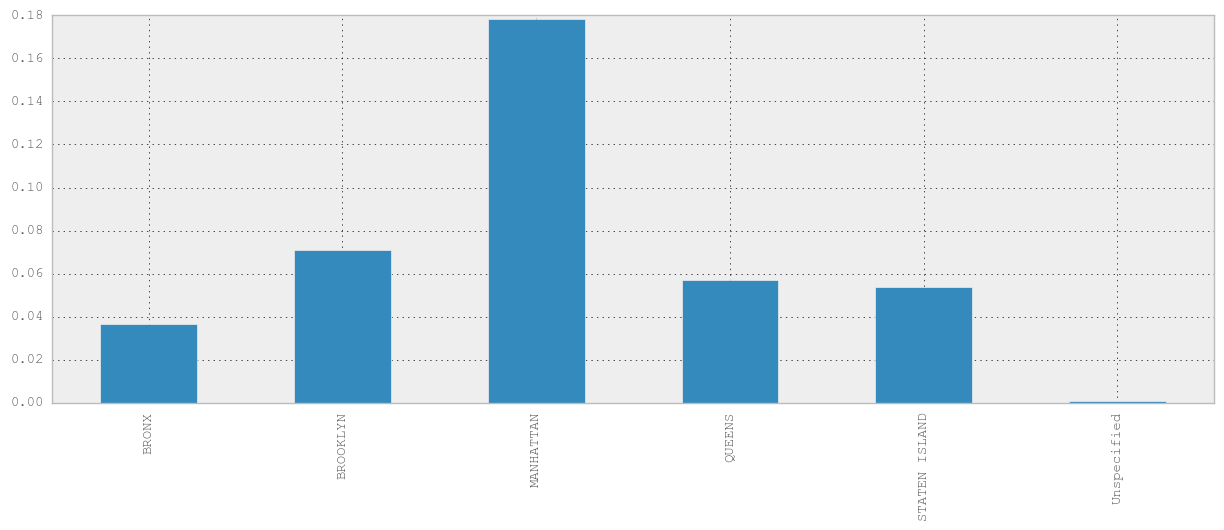

In [27]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  